# Developer Salary Prediction

Data obtained from [Stack Overflow](https://insights.stackoverflow.com/survey).

In [32]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## 1. Load + Explore Data

Make sure to unzip file first.

In [2]:
df = pd.read_csv("survey_results_public.csv")

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

## 2. Data Cleaning

In [5]:
# Keep necessary columns only 

df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]

In [6]:
# Rename ConvertedComp column

df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [7]:
# Keep records where salary is not null

df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [9]:
# Remove all remaining records with missing values

df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
# Explore Employment column

df['Employment'].value_counts()

Employment
Employed, full-time                                                                             39155
Independent contractor, freelancer, or self-employed                                             3880
Employed, full-time;Independent contractor, freelancer, or self-employed                         3282
Employed, part-time                                                                               899
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Retired                                                                                            33
I prefer not to say                                                                                33
Independent contractor, freelancer, or self-employed;Retired           

In [11]:
# Keep only records where employment type is full time

df = df[df['Employment'].str.contains('Employed, full-time')]

In [12]:
# Drop Employment column (not necessary for prediction)

df = df.drop("Employment", axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42709 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       42709 non-null  object 
 1   EdLevel       42709 non-null  object 
 2   YearsCodePro  42709 non-null  object 
 3   Salary        42709 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


In [14]:
# Explore Country column

df['Country'].value_counts()

Country
United States of America                                11270
Germany                                                  3402
United Kingdom of Great Britain and Northern Ireland     3216
Canada                                                   1944
India                                                    1746
                                                        ...  
Lesotho                                                     1
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Antigua and Barbuda                                         1
Name: count, Length: 167, dtype: int64

In [15]:
# Function that will combine all countries with inputs fewer than cutoff point into "Other"

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [16]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                11270
Other                                                    9743
Germany                                                  3402
United Kingdom of Great Britain and Northern Ireland     3216
Canada                                                   1944
India                                                    1746
France                                                   1553
Brazil                                                   1113
Netherlands                                              1087
Australia                                                1071
Spain                                                    1020
Poland                                                    958
Sweden                                                    947
Italy                                                     877
Switzerland                                               540
Denmark                                                   468


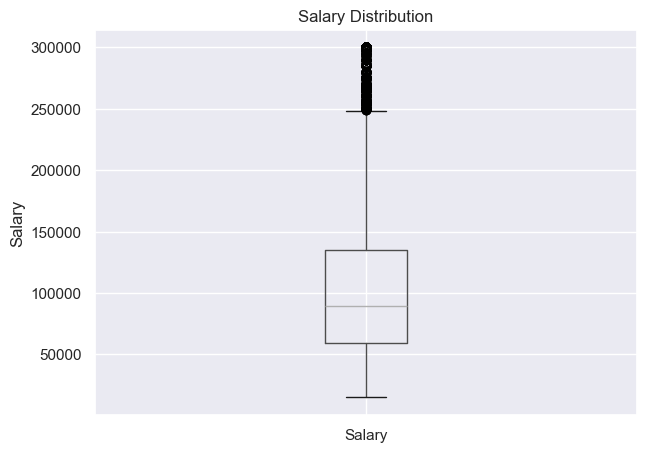

In [33]:
# Visualize salary distribution

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
df.boxplot('Salary', ax=ax)
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.show()

In [19]:
# Specify range of salaries to be used

df = df[df["Salary"] <= 300000] # Max of 300k
df = df[df["Salary"] >= 15000] # Min of 15k

In [20]:
# Drop all countries in "Other" categories

df = df[df['Country'] != 'Other'] # Drop Other countries

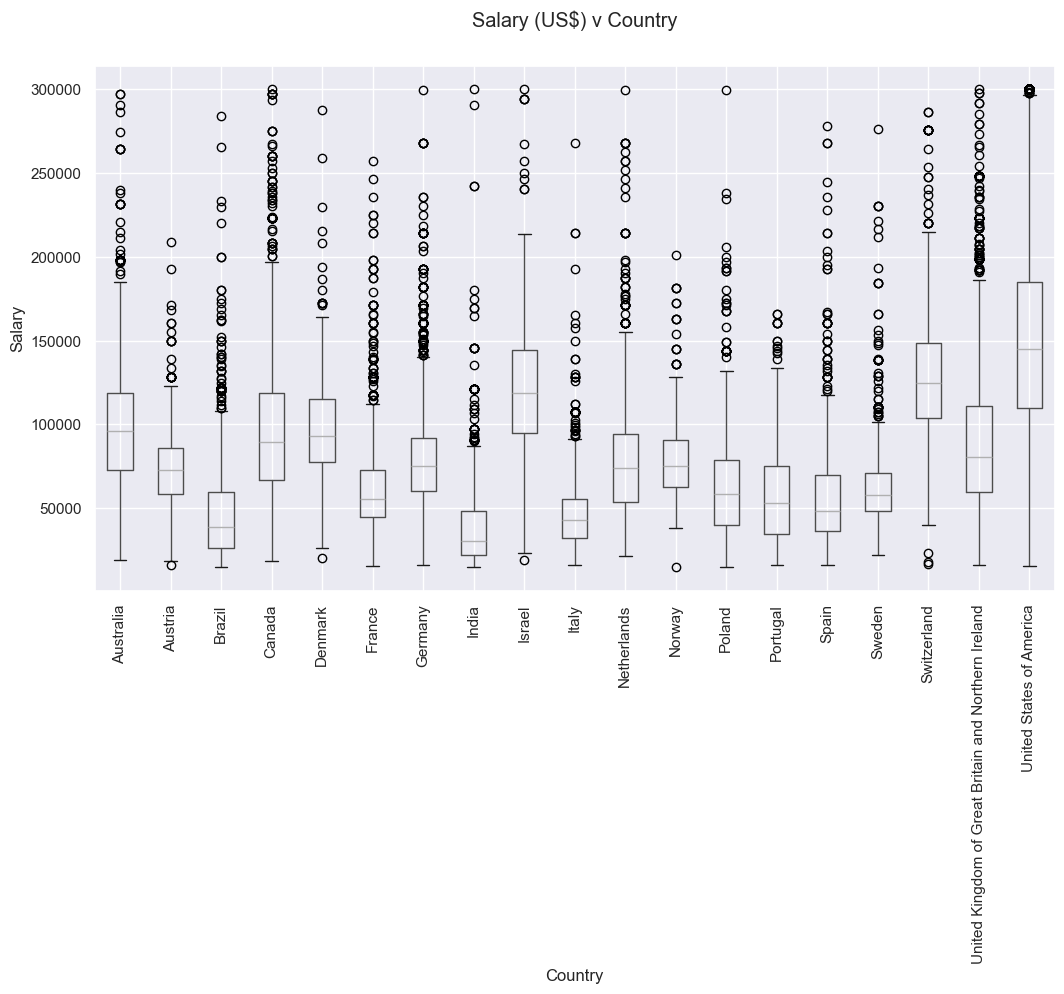

In [34]:
# Visualize salary across different countries

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Inspect YearsCodePro column

df["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '11', '8', '18', '30', '27', '17', '43', '26', '38', '33',
       '29', '22', '1', '34', '42', '31', '36', '39', '35', '40', '32',
       '44', '37', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [24]:
# Function to convert string to float and to clean up YearsCodePro column

def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30763 entries, 1 to 89170
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30763 non-null  object 
 1   EdLevel       30763 non-null  object 
 2   YearsCodePro  30763 non-null  float64
 3   Salary        30763 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


In [26]:
# Inspect EdLevel column

df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [27]:
# Function to group values in EdLevel column into 4 groups

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [28]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

## 3. Preprocessing

In [35]:
# Transform string values in EdLevel to numerical (map each value to a number)
# Order does not matter

from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 1, 2, 3])

In [36]:
# Transform string values in Country column to numerical (map each value to a number)

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([18, 17,  0, 10,  6, 15,  5, 14,  2, 13,  9,  3, 16,  7,  1, 11, 12,
        4,  8])

In [37]:
# Split data into X (features) and y (label)

X = df.drop("Salary", axis=1)
y = df["Salary"]

In [38]:
# Split data into train/test
# Use random_state to get the same results (optional)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)

## 4. Model Training

Try 2 different regression models (optional).

### LinearRegression()

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [40]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = linear_reg.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [43]:
error

# Very high given range of salaries

np.float64(49919.396298590524)

### DecisionTreeRegressor()

In [44]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=34)

In [45]:
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=34)

In [46]:
y_pred = dec_tree_reg.predict(X_test)

In [47]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$40,994.89


In [48]:
# Gridsearch to find optimal parameters

from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [49]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$39,374.78


## 5. New Input

In [50]:
X

,Country,EdLevel,YearsCodePro
1,18,0,9.0
2,18,0,23.0
3,18,0,7.0
5,17,1,21.0
6,18,1,3.0
...,...,...,...
89156,18,0,8.0
89158,15,0,8.0
89162,2,2,24.0
89167,7,0,2.0


In [51]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [52]:
# Apply label encoder on country & education strings

X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[18.,  2., 15.]])

In [53]:
# Predicted salary

y_pred = regressor.predict(X)
y_pred

C:\Users\Rajnish\miniforge3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([175563.07082153])

## 6. Export Model 

In [54]:
import pickle

In [55]:
# Save model, country encoder, education encoder (use a dict)

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [56]:
# Open saved data (model + encoders) to test if prediction works

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [57]:
y_pred = regressor_loaded.predict(X)
y_pred

# Same prediction as earlier

C:\Users\Rajnish\miniforge3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([175563.07082153])